#### GINI and GDP data for WDVP

In [152]:
import pandas as pd # wrangling
import numpy as np # stats
import wget # api call
import zipfile # unzip folders
import seaborn as sns

In [15]:
# only need to run this cell once! data download & unzipping
# read in GINI data from WorldBank
URL = "https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv"
data_zipped = wget.download(URL)

# unzip
with zipfile.ZipFile(data_zipped,"r") as zip_ref:
    zip_ref.extractall("gini_data")

In [155]:
# read in data
gini_df = pd.read_csv('gini_data/API_SI.POV.GINI_DS2_en_csv_v2_4770433.csv', skiprows=[0,1,2])

# keep only data for the most recent 10 years (starting 2020 because 2021 only has one observation)
print(gini_df['2021'].isna().sum())

col_list = ['Country Name','Country Code','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

gini_df = gini_df.loc[:, col_list]

265


In [156]:
# group by continent
# countries by continent csv file: found on github
data_country = pd.read_csv('countries_continents.csv')

# get set of countries in list but not in GINI df
diff_list = list(set(data_country['Country']) - set(gini_df['Country Name']))
print(diff_list)

# manually check gini list & country list - some of them are not present but if they are, we want to name them consistently
# tried to do a fuzzy match but it was prone to overcorrection - e.g. Aruba got coded as Cuba:
#gini_df['test'] = gini_df['Country Name'].map(lambda x: difflib.get_close_matches(x, data_country['Country']))

gini_current_list = ['Iran, Islamic Rep.','Egypt, Arab Rep.','Congo, Rep.','Syrian Arab Republic','Russian Federation',"Korea, Dem. People's Rep.",'Brunei Darussalam','Yemen, Rep.','Venezuela, RB',
                     'St. Kitts and Nevis','Lao PDR','St. Lucia','Micronesia, Fed. Sts.','Gambia, The','Congo, Dem. Rep.','Slovak Republic',
                     'St. Vincent and the Grenadines','Kyrgyz Republic','Bahamas, The','Korea, Rep.']
gini_replace_list = ['Iran','Egypt','Republic of the Congo','Syria','Russia','North Korea','Brunei','Yemen','Venezuela',
                     'Saint Kitts and Nevis','Laos','Saint Lucia','Micronesia','The Gambia','Democratic Republic of the Congo','Slovakia',
                     'Saint Vincent and the Grenadines','Krygyzstan','The Bahamas','South Korea']


['Iran', 'Egypt', 'Republic of the Congo', 'Vatican City', 'Syria', 'Palestine', 'Russia', 'North Korea', 'Brunei', 'Yemen', 'Venezuela', 'Saint Kitts and Nevis', 'The Bahamas', 'Laos', 'Saint Lucia', 'Micronesia', 'The Gambia', 'Democratic Republic of the Congo', 'Slovakia', 'Saint Vincent and the Grenadines', 'Kyrgyzstan', 'South Korea']


In [157]:
# function to replace original strings with corresponding updated strings
def text_replace(orig_string, orig_list, replacement_list):
    if orig_string in orig_list:
        string_index = orig_list.index(orig_string)
        updated_string = orig_string.replace(orig_string, replacement_list[string_index])
    else:
        updated_string = orig_string

    return(updated_string)

#data_country['Country'] = data_country.apply(lambda x: text_replace(x['Country'],country_current_list,country_replace_list), axis=1)
gini_df['Country Name'] = gini_df.apply(lambda x: text_replace(x['Country Name'], gini_current_list, gini_replace_list), axis=1)


In [158]:
# check diffs again
diff_list1 = list(set(data_country['Country']) - set(gini_df['Country Name']))
print(diff_list1)

# this one has a lot but it's fine, we can drop all the non-matching ones at this point.
diff_list2 = list(set(gini_df['Country Name']) - set(data_country['Country']))
print(diff_list2)

gini_df = gini_df.rename(columns={"Country Name": "Country"})
gini_df = gini_df.merge(data_country,how='left')


['Palestine', 'Vatican City', 'Kyrgyzstan']
['IDA only', 'Latin America & Caribbean (excluding high income)', 'Fragile and conflict affected situations', 'Low & middle income', 'East Asia & Pacific (excluding high income)', 'Faroe Islands', 'South Asia (IDA & IBRD)', 'Pacific island small states', 'Middle East & North Africa', 'Middle income', 'Northern Mariana Islands', 'Channel Islands', 'North America', 'Sint Maarten (Dutch part)', 'Sub-Saharan Africa', 'Middle East & North Africa (IDA & IBRD countries)', 'Puerto Rico', 'OECD members', 'Least developed countries: UN classification', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)', 'Not classified', 'Small states', 'European Union', 'South Asia', 'Isle of Man', 'East Asia & Pacific', 'Low income', 'Bermuda', 'Caribbean small states', 'Curacao', 'IDA & IBRD total', 'New Caledonia', 'Heavily indebted poor countries (HIPC)', 'Pre-demographic dividend', 'IDA blend', 'Europe & Central A

In [177]:
gini_sum

,Continent,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa,39.600000,38.800000,42.820000,42.055556,42.807692,44.100000,39.325000,38.186667,43.833333,NaN
1,Asia,37.041667,37.546667,36.691667,35.884615,37.528571,35.760000,36.681818,36.053333,37.025000,36.200000
2,Europe,31.128205,31.678049,31.850000,31.775610,31.646341,31.482927,31.229268,31.186842,30.403333,27.425000
3,North America,47.266667,45.066667,45.185714,45.280000,44.157143,45.255556,43.185714,45.214286,44.733333,44.766667
4,Oceania,NaN,35.950000,38.500000,34.400000,37.600000,33.700000,NaN,34.300000,31.575000,NaN
5,South America,47.355556,46.487500,46.533333,46.612500,46.387500,45.925000,45.455556,45.212500,45.250000,45.411111


In [184]:

gini_sum = gini_df.groupby('Continent',dropna=True,as_index=False).agg('mean')
gini_long = pd.melt(gini_sum, id_vars='Continent',var_name='Year',value_name='GINI')

gini_long

C:\Users\ivakr\AppData\Local\Temp\ipykernel_14264\2855977499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gini_sum = gini_df.groupby('Continent',dropna=True,as_index=False).agg('mean')


,Continent,Year,GINI
0,Africa,2011,39.600000
1,Asia,2011,37.041667
2,Europe,2011,31.128205
3,North America,2011,47.266667
4,Oceania,2011,NaN
5,South America,2011,47.355556
6,Africa,2012,38.800000
7,Asia,2012,37.546667
8,Europe,2012,31.678049
9,North America,2012,45.066667


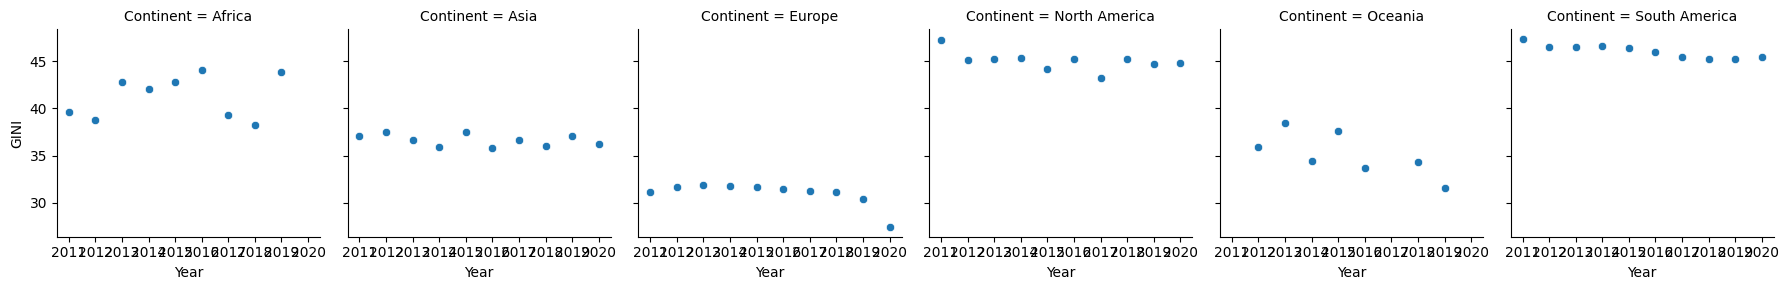

In [185]:
g = sns.FacetGrid(gini_long, col="Continent")
g.map(sns.scatterplot, "Year", "GINI")